In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
readIn = pd.read_csv("data/training_data.csv")
df = pd.DataFrame(readIn)


In [3]:
readIn = pd.read_csv("data/data_submission_example.csv")
df_target = pd.DataFrame(readIn)
# df_target.head(20)

# print(df_target.shape)
# print(df_target['BORROWER_ID'].unique)

In [4]:
# print(df.shape)

# index_to_keep = df['BORROWER_ID'].isin(df_target['BORROWER_ID'])

# df = df[index_to_keep]

# print(df.shape)

In [5]:
df.head(10)

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
0,TpK8osXs,d8SqtuEV,1d42bbf5,2.0,0.0,31,2457052,NaN,479a2e13,NaN,...,1.00,NaN,1217.0,98.0,98.0,20.0,A,NaN,-,NaN
1,EtIEHrcH,lrdxML0g,1d42bbf5,NaN,0.0,31,2457036,NaN,479a2e13,NaN,...,74.17,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
2,1G10DfKj,gII7nnq4,1d42bbf5,2.0,16350.0,31,2457043,7.05,479a2e13,127305.0,...,74.77,100003.0,1199.0,98.0,98.0,179.0,A,7.0,-,NaN
3,2NLT774,MMkJ8z/e,1d42bbf5,NaN,0.0,31,2457038,NaN,479a2e13,NaN,...,0.99,NaN,1221.0,98.0,98.0,NaN,A,NaN,-,NaN
4,VpylRvay,M417onFP,1d42bbf5,2.0,2395.0,31,2457091,NaN,479a2e13,NaN,...,74.30,100002.0,1260.0,98.0,98.0,178.0,A,1.0,-,NaN
5,5tsDwTjS,u9GRAuen,1d42bbf5,2.0,0.0,31,2457093,NaN,479a2e13,NaN,...,0.98,NaN,1204.0,98.0,98.0,NaN,A,NaN,-,NaN
6,drZAWXaR,XPWFcJZI,1d42bbf5,NaN,0.0,31,2457095,33.94,479a2e13,172647.0,...,1.00,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
7,ebtK6u+,L2Nu2zZe,1d42bbf5,2.0,0.0,31,2457046,NaN,479a2e13,NaN,...,1.03,NaN,1255.0,98.0,98.0,4.0,A,NaN,-,NaN
8,ffJh4MY,5A0GWOi2,1d42bbf5,2.0,0.0,31,2457049,NaN,479a2e13,NaN,...,1.04,NaN,1234.0,98.0,98.0,NaN,A,NaN,-,NaN
9,eo09vYuo,lqPGd2+x,1d42bbf5,2.0,0.0,31,2457081,NaN,479a2e13,NaN,...,1.00,0.0,1228.0,98.0,98.0,3.0,A,NaN,-,NaN


In [6]:
data_count=len(df)

In [7]:
data_count

1602753

In [8]:
coloumns=[
    'CONTRACT_ID',
    'BORROWER_ID',
    'CONTRACT_BANK_ID',
    'CONTRACT_CREDIT_INTERMEDIARY',
    'CONTRACT_CREDIT_LOSS',
    'CONTRACT_CURRENCY',
    'CONTRACT_DATE_OF_LOAN_AGREEMENT',
    'CONTRACT_DEPT_SERVICE_TO_INCOME',
    'CONTRACT_FREQUENCY_TYPE',
    'CONTRACT_INCOME',
    'CONTRACT_INSTALMENT_AMOUNT',
    'CONTRACT_INSTALMENT_AMOUNT_2',
    'CONTRACT_INTEREST_PERIOD',
    'CONTRACT_INTEREST_RATE',
    'CONTRACT_LGD',
    'CONTRACT_LOAN_AMOUNT',
    'CONTRACT_LOAN_CONTRACT_TYPE',
    'CONTRACT_LOAN_TO_VALUE_RATIO',
    'CONTRACT_LOAN_TYPE',
    'CONTRACT_MARKET_VALUE',
    'CONTRACT_MATURITY_DATE',
    'CONTRACT_MORTGAGE_LENDING_VALUE',
    'CONTRACT_MORTGAGE_TYPE',
    'CONTRACT_REFINANCED',
    'CONTRACT_RISK_WEIGHTED_ASSETS',
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT',
    'BORROWER_BIRTH_YEAR',
    'BORROWER_CITIZENSHIP',
    'BORROWER_COUNTRY',
    'BORROWER_COUNTY',
    'BORROWER_TYPE_OF_CUSTOMER',
    'BORROWER_TYPE_OF_SETTLEMENT',
    'TARGET_EVENT',
    'TARGET_EVENT_DAY'
]

# coloumns=[
#     'CONTRACT_ID',
#     'BORROWER_ID',
#     'CONTRACT_BANK_ID',
#     'CONTRACT_CREDIT_LOSS',
#     'CONTRACT_CURRENCY',
#     'CONTRACT_DATE_OF_LOAN_AGREEMENT',
#     'CONTRACT_FREQUENCY_TYPE',
#     'CONTRACT_LOAN_AMOUNT',
#     'CONTRACT_LOAN_CONTRACT_TYPE',
#     'CONTRACT_LOAN_TYPE',
#     'CONTRACT_MATURITY_DATE',
#     'BORROWER_TYPE_OF_CUSTOMER',
#     'TARGET_EVENT'
# ]

In [9]:
df=df[coloumns]

# Data cleaning

In [10]:
bemeno= []

## Coloumns

### CONTRACT_ID

### BORROWER_ID

In [11]:
df['BORROWER_ID'].value_counts()

BORROWER_ID
xNullx      1090
akvNVipI      24
qW3B+pgb      22
95IQewTL      19
JARtY3P1      18
            ... 
LqRn3EsW       1
odaCvCmO       1
seFkKZ2U       1
WJWtceMu       1
Dxng1cGs       1
Name: count, Length: 1149851, dtype: int64

In [12]:
# cols= [
#     'BORROWER_ID',
#     'BORROWER_BIRTH_YEAR',
#     'BORROWER_CITIZENSHIP',
#     'BORROWER_COUNTRY',
#     'BORROWER_COUNTY',
#     'BORROWER_TYPE_OF_CUSTOMER',
# ]

# df_borrower=df[cols]

# print(df_borrower.isna().sum())

In [13]:
print(df.isna().sum())

CONTRACT_ID                                  0
BORROWER_ID                                  0
CONTRACT_BANK_ID                             0
CONTRACT_CREDIT_INTERMEDIARY             59422
CONTRACT_CREDIT_LOSS                     36154
CONTRACT_CURRENCY                            0
CONTRACT_DATE_OF_LOAN_AGREEMENT              0
CONTRACT_DEPT_SERVICE_TO_INCOME         201480
CONTRACT_FREQUENCY_TYPE                      0
CONTRACT_INCOME                         198022
CONTRACT_INSTALMENT_AMOUNT             1314531
CONTRACT_INSTALMENT_AMOUNT_2             42438
CONTRACT_INTEREST_PERIOD                371312
CONTRACT_INTEREST_RATE                   35370
CONTRACT_LGD                             33722
CONTRACT_LOAN_AMOUNT                         0
CONTRACT_LOAN_CONTRACT_TYPE                  0
CONTRACT_LOAN_TO_VALUE_RATIO           1176530
CONTRACT_LOAN_TYPE                           0
CONTRACT_MARKET_VALUE                  1074843
CONTRACT_MATURITY_DATE                       0
CONTRACT_MORT

### BORROWER_BIRTH_YEAR

In [14]:
print(df['BORROWER_BIRTH_YEAR'].min ())
print(df['BORROWER_BIRTH_YEAR'].max())
df['BORROWER_BIRTH_YEAR'] = df.groupby('BORROWER_ID')['BORROWER_BIRTH_YEAR'].transform('max')

df['BORROWER_BIRTH_YEAR']=df['BORROWER_BIRTH_YEAR'].mode().max()
df.head(10)

1187.0
1287.0


,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
0,TpK8osXs,d8SqtuEV,1d42bbf5,2.0,0.0,31,2457052,NaN,479a2e13,NaN,...,1.00,NaN,1246.0,98.0,98.0,20.0,A,NaN,-,NaN
1,EtIEHrcH,lrdxML0g,1d42bbf5,NaN,0.0,31,2457036,NaN,479a2e13,NaN,...,74.17,NaN,1246.0,NaN,NaN,NaN,A,NaN,-,NaN
2,1G10DfKj,gII7nnq4,1d42bbf5,2.0,16350.0,31,2457043,7.05,479a2e13,127305.0,...,74.77,100003.0,1246.0,98.0,98.0,179.0,A,7.0,-,NaN
3,2NLT774,MMkJ8z/e,1d42bbf5,NaN,0.0,31,2457038,NaN,479a2e13,NaN,...,0.99,NaN,1246.0,98.0,98.0,NaN,A,NaN,-,NaN
4,VpylRvay,M417onFP,1d42bbf5,2.0,2395.0,31,2457091,NaN,479a2e13,NaN,...,74.30,100002.0,1246.0,98.0,98.0,178.0,A,1.0,-,NaN
5,5tsDwTjS,u9GRAuen,1d42bbf5,2.0,0.0,31,2457093,NaN,479a2e13,NaN,...,0.98,NaN,1246.0,98.0,98.0,NaN,A,NaN,-,NaN
6,drZAWXaR,XPWFcJZI,1d42bbf5,NaN,0.0,31,2457095,33.94,479a2e13,172647.0,...,1.00,NaN,1246.0,NaN,NaN,NaN,A,NaN,-,NaN
7,ebtK6u+,L2Nu2zZe,1d42bbf5,2.0,0.0,31,2457046,NaN,479a2e13,NaN,...,1.03,NaN,1246.0,98.0,98.0,4.0,A,NaN,-,NaN
8,ffJh4MY,5A0GWOi2,1d42bbf5,2.0,0.0,31,2457049,NaN,479a2e13,NaN,...,1.04,NaN,1246.0,98.0,98.0,NaN,A,NaN,-,NaN
9,eo09vYuo,lqPGd2+x,1d42bbf5,2.0,0.0,31,2457081,NaN,479a2e13,NaN,...,1.00,0.0,1246.0,98.0,98.0,3.0,A,NaN,-,NaN


In [15]:
print(df.isna().sum())

CONTRACT_ID                                  0
BORROWER_ID                                  0
CONTRACT_BANK_ID                             0
CONTRACT_CREDIT_INTERMEDIARY             59422
CONTRACT_CREDIT_LOSS                     36154
CONTRACT_CURRENCY                            0
CONTRACT_DATE_OF_LOAN_AGREEMENT              0
CONTRACT_DEPT_SERVICE_TO_INCOME         201480
CONTRACT_FREQUENCY_TYPE                      0
CONTRACT_INCOME                         198022
CONTRACT_INSTALMENT_AMOUNT             1314531
CONTRACT_INSTALMENT_AMOUNT_2             42438
CONTRACT_INTEREST_PERIOD                371312
CONTRACT_INTEREST_RATE                   35370
CONTRACT_LGD                             33722
CONTRACT_LOAN_AMOUNT                         0
CONTRACT_LOAN_CONTRACT_TYPE                  0
CONTRACT_LOAN_TO_VALUE_RATIO           1176530
CONTRACT_LOAN_TYPE                           0
CONTRACT_MARKET_VALUE                  1074843
CONTRACT_MATURITY_DATE                       0
CONTRACT_MORT

### BORROWER_CITIZENSHIP

In [16]:
df['BORROWER_CITIZENSHIP'] = df.groupby('BORROWER_ID')['BORROWER_CITIZENSHIP'].transform('max')
df['BORROWER_CITIZENSHIP']=df['BORROWER_CITIZENSHIP'].mode().max()
print(df.isna().sum())

CONTRACT_ID                                  0
BORROWER_ID                                  0
CONTRACT_BANK_ID                             0
CONTRACT_CREDIT_INTERMEDIARY             59422
CONTRACT_CREDIT_LOSS                     36154
CONTRACT_CURRENCY                            0
CONTRACT_DATE_OF_LOAN_AGREEMENT              0
CONTRACT_DEPT_SERVICE_TO_INCOME         201480
CONTRACT_FREQUENCY_TYPE                      0
CONTRACT_INCOME                         198022
CONTRACT_INSTALMENT_AMOUNT             1314531
CONTRACT_INSTALMENT_AMOUNT_2             42438
CONTRACT_INTEREST_PERIOD                371312
CONTRACT_INTEREST_RATE                   35370
CONTRACT_LGD                             33722
CONTRACT_LOAN_AMOUNT                         0
CONTRACT_LOAN_CONTRACT_TYPE                  0
CONTRACT_LOAN_TO_VALUE_RATIO           1176530
CONTRACT_LOAN_TYPE                           0
CONTRACT_MARKET_VALUE                  1074843
CONTRACT_MATURITY_DATE                       0
CONTRACT_MORT

### BORROWER_COUNTRY

In [17]:
df['BORROWER_COUNTRY']=df['BORROWER_COUNTRY'].fillna(0)

### BORROWER_COUNTY

In [18]:
df['BORROWER_COUNTY']=df['BORROWER_COUNTY'].fillna(0)

### BORROWER_TYPE_OF_CUSTOMER

### BORROWER_TYPE_OF_SETTLEMENT

In [19]:
df['BORROWER_TYPE_OF_SETTLEMENT']=df['BORROWER_TYPE_OF_SETTLEMENT'].fillna(0)

### CONTRACT_BANK_ID

In [20]:
len(df)

1602753

### CONTRACT_CREDIT_INTERMEDIARY

In [21]:
df['CONTRACT_CREDIT_INTERMEDIARY'].value_counts()

CONTRACT_CREDIT_INTERMEDIARY
2.0        1069644
1.0         454073
20001.0      18654
0.0            960
Name: count, dtype: int64

In [22]:
df['CONTRACT_CREDIT_INTERMEDIARY']=df['CONTRACT_CREDIT_INTERMEDIARY'].fillna(0)

In [23]:
# df['CONTRACT_CREDIT_INTERMEDIARY']=df['CONTRACT_CREDIT_INTERMEDIARY'].apply(lambda x: 2 if x==20001 else x)

In [24]:
# df['CONTRACT_CREDIT_INTERMEDIARY'].value_counts()

### CONTRACT_CREDIT_LOSS

????? ez full zavaros

<Axes: >

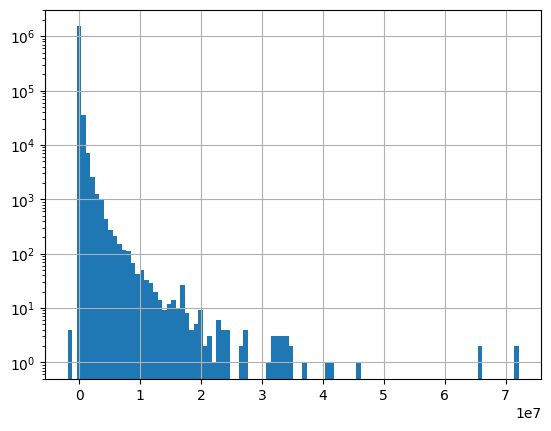

In [25]:
df['CONTRACT_CREDIT_LOSS'].hist(bins=100, log=True)

In [26]:
loss_mean=df['CONTRACT_CREDIT_LOSS'].mean()
df['CONTRACT_CREDIT_LOSS']=df['CONTRACT_CREDIT_LOSS'].fillna(0)

In [27]:
len(df[df['CONTRACT_CREDIT_LOSS']-56532<1])

1405114

<Axes: >

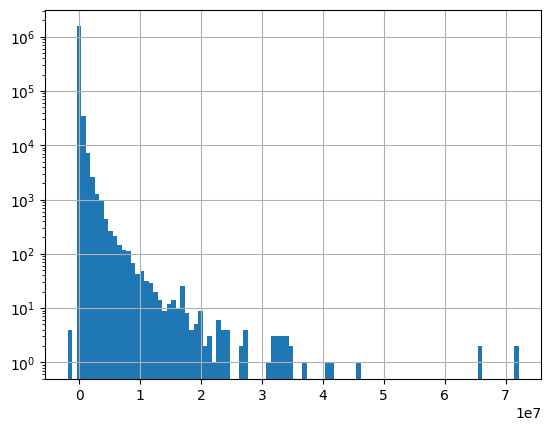

In [28]:
df['CONTRACT_CREDIT_LOSS'].hist(bins=100, log=True)

In [28]:
df1=df[df['TARGET_EVENT']=='K']
df2=df[df['TARGET_EVENT']=='E']
df3=df[df['TARGET_EVENT']=='-']

In [36]:
df3['CONTRACT_CREDIT_LOSS'].mean()

48716.4619398281

In [29]:
df['CONTRACT_CREDIT_LOSS']=abs(df['CONTRACT_CREDIT_LOSS'])

<Axes: >

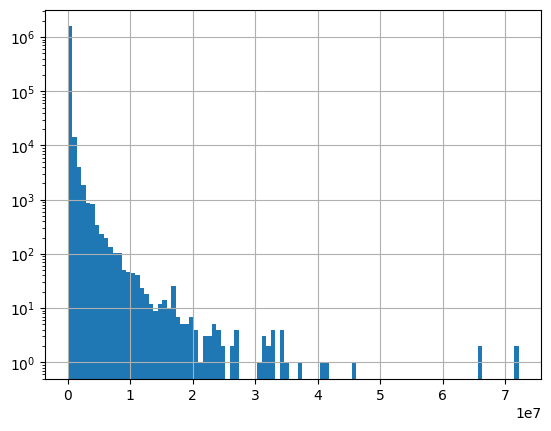

In [30]:
df['CONTRACT_CREDIT_LOSS'].hist(bins=100, log=True)

In [31]:
df.shape
# df = df[~((df['TARGET_EVENT'] == 'K') & (df['CONTRACT_CREDIT_LOSS'] == 0))]

(1602753, 34)

In [32]:
df2=df[df['CONTRACT_CREDIT_LOSS'] == 0]

df2['TARGET_EVENT'].value_counts()

TARGET_EVENT
-    409134
E     16029
K       116
Name: count, dtype: int64

In [33]:
df3=df[df['CONTRACT_CREDIT_LOSS'] > df['CONTRACT_CREDIT_LOSS'].max()*0.1]

df3['TARGET_EVENT'].value_counts()

TARGET_EVENT
-    366
E    157
K     66
Name: count, dtype: int64

### CONTRACT_CURRENCY

In [34]:
df['CONTRACT_CURRENCY']=df['CONTRACT_CURRENCY'].fillna(0)

### CONTRACT_DATE_OF_LOAN_AGREEMENT

In [35]:
len(df)

1602753

### CONTRACT_DEBT_SERVICE_TO_INCOME

<Axes: >

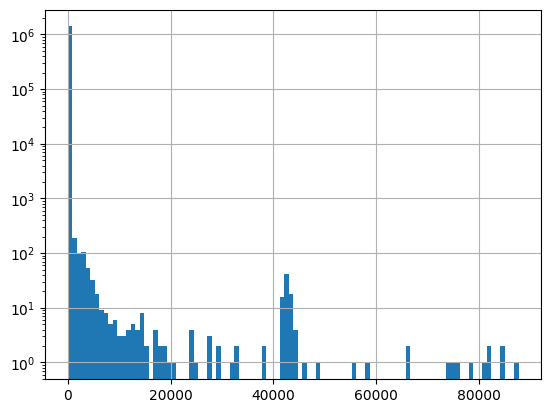

In [36]:
df['CONTRACT_DEPT_SERVICE_TO_INCOME'].hist(bins=100, log=True)

In [37]:
df['CONTRACT_DEPT_SERVICE_TO_INCOME']=df['CONTRACT_DEPT_SERVICE_TO_INCOME'].fillna(0)

In [38]:
len(df)

1602753

### CONTRACT_FREQUENCY_TYPE

In [39]:
df['CONTRACT_FREQUENCY_TYPE'].value_counts()

CONTRACT_FREQUENCY_TYPE
479a2e13    1477500
2f88e16c      58702
87db11f5      47152
3265c5b7      17386
ad534644       1616
89efd382        337
2aebe4cb         53
bd092d5a          7
Name: count, dtype: int64

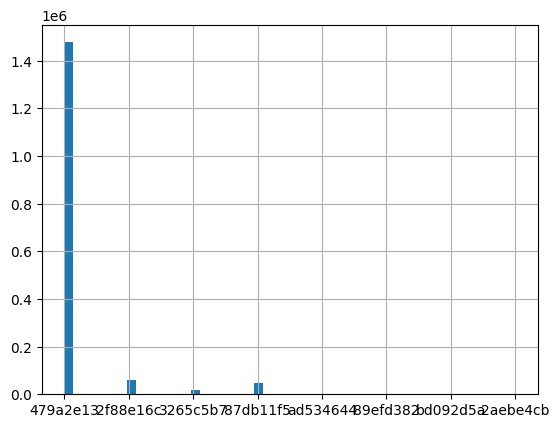

In [40]:
df['CONTRACT_FREQUENCY_TYPE'].hist(bins=50)
plt.show()

### CONTRACT_INCOME

In [41]:
df['CONTRACT_INCOME']=df['CONTRACT_INCOME'].fillna(0)

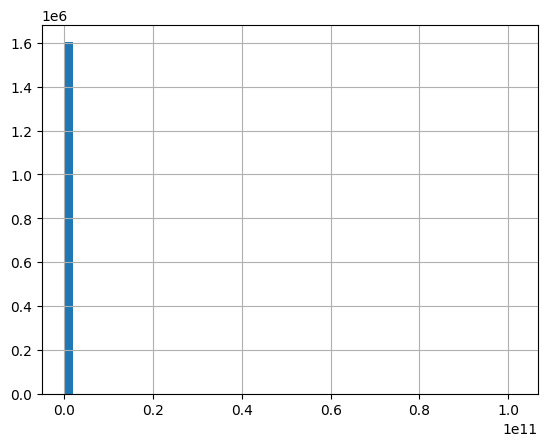

In [42]:
df['CONTRACT_INCOME'].hist(bins=50)
plt.show()

In [43]:
cols=['CONTRACT_DEPT_SERVICE_TO_INCOME','CONTRACT_INCOME', 'CONTRACT_LOAN_AMOUNT' ]

df[cols].head(20)

,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_INCOME,CONTRACT_LOAN_AMOUNT
0,0.00,0.0,192161
1,0.00,0.0,55590
2,7.05,127305.0,275924
3,0.00,0.0,138862
4,0.00,0.0,169624
5,0.00,0.0,100079
6,33.94,172647.0,338415
7,0.00,0.0,140975
8,0.00,0.0,60963
9,0.00,0.0,190782


### CONTRACT_INSTALMENT_AMOUNT and _2

In [44]:
df2 = df[((df['CONTRACT_INSTALMENT_AMOUNT'] >0) & (df['CONTRACT_INSTALMENT_AMOUNT_2'].isna()))]
df2

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
1,EtIEHrcH,lrdxML0g,1d42bbf5,0.0,0.0,31,2457036,0.00,479a2e13,0.0,...,74.17,NaN,1246.0,98.0,0.0,0.0,A,0.0,-,NaN
6,drZAWXaR,XPWFcJZI,1d42bbf5,0.0,0.0,31,2457095,33.94,479a2e13,172647.0,...,1.00,NaN,1246.0,98.0,0.0,0.0,A,0.0,-,NaN
13,MVWmtax,zPuIFg21,1d42bbf5,0.0,0.0,31,2457112,0.00,479a2e13,0.0,...,NaN,NaN,1246.0,98.0,0.0,0.0,A,0.0,-,NaN
15,d8KR1-k,G/3PUQP2,1d42bbf5,0.0,0.0,31,2457100,0.00,479a2e13,0.0,...,NaN,NaN,1246.0,98.0,0.0,0.0,A,0.0,-,NaN
38,HyKm+mv1,DN940EUH,1d42bbf5,0.0,0.0,31,2457107,11.65,479a2e13,169430.0,...,NaN,NaN,1246.0,98.0,0.0,0.0,A,0.0,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602528,S4fPRnb5,DsDySXH3,04f86595,0.0,0.0,31,2457052,0.00,479a2e13,0.0,...,NaN,NaN,1246.0,98.0,0.0,0.0,A,0.0,-,NaN
1602542,9s9hnx+N,PcuwvVuO,3b3b8a5e,0.0,0.0,31,2457239,0.00,479a2e13,0.0,...,NaN,NaN,1246.0,98.0,0.0,0.0,A,0.0,E,2457262.0
1602553,x9bJHj0X,vPskTXgG,04f86595,0.0,0.0,31,2457052,0.00,479a2e13,0.0,...,NaN,NaN,1246.0,98.0,0.0,0.0,A,0.0,-,NaN
1602658,m0yBW+xn,W9ou2AkK,04f86595,0.0,0.0,31,2457052,0.00,479a2e13,0.0,...,NaN,NaN,1246.0,98.0,0.0,0.0,A,0.0,-,NaN


In [45]:
df['CONTRACT_INSTALMENT_AMOUNT'] = df['CONTRACT_INSTALMENT_AMOUNT'].fillna(df['CONTRACT_INSTALMENT_AMOUNT_2'])


In [46]:
df['CONTRACT_INSTALMENT_AMOUNT'] = df['CONTRACT_INSTALMENT_AMOUNT'].fillna(0)

In [47]:
df = df.drop('CONTRACT_INSTALMENT_AMOUNT_2', axis=1)

In [48]:
print(df.isna().sum())

CONTRACT_ID                                  0
BORROWER_ID                                  0
CONTRACT_BANK_ID                             0
CONTRACT_CREDIT_INTERMEDIARY                 0
CONTRACT_CREDIT_LOSS                         0
CONTRACT_CURRENCY                            0
CONTRACT_DATE_OF_LOAN_AGREEMENT              0
CONTRACT_DEPT_SERVICE_TO_INCOME              0
CONTRACT_FREQUENCY_TYPE                      0
CONTRACT_INCOME                              0
CONTRACT_INSTALMENT_AMOUNT                   0
CONTRACT_INTEREST_PERIOD                371312
CONTRACT_INTEREST_RATE                   35370
CONTRACT_LGD                             33722
CONTRACT_LOAN_AMOUNT                         0
CONTRACT_LOAN_CONTRACT_TYPE                  0
CONTRACT_LOAN_TO_VALUE_RATIO           1176530
CONTRACT_LOAN_TYPE                           0
CONTRACT_MARKET_VALUE                  1074843
CONTRACT_MATURITY_DATE                       0
CONTRACT_MORTGAGE_LENDING_VALUE        1064936
CONTRACT_MORT

### CONTRACT_INTEREST_PERIOD

In [49]:
len(df['CONTRACT_INTEREST_PERIOD'].unique())

1039

<Axes: >

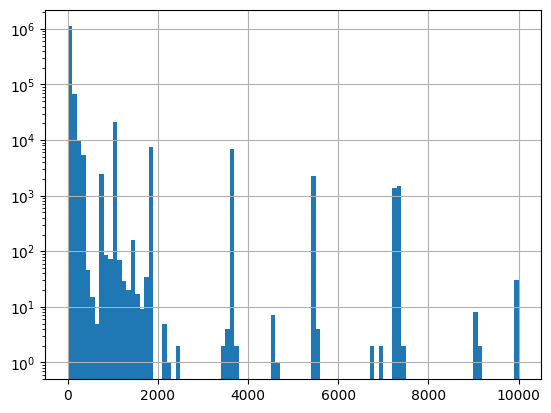

In [50]:
df['CONTRACT_INTEREST_PERIOD'].hist(bins=100, log=True)

In [51]:
df = df.drop('CONTRACT_INTEREST_PERIOD', axis=1)

### CONTRACT_INTEREST_RATE

In [52]:
df['CONTRACT_INTEREST_RATE']=df['CONTRACT_INTEREST_RATE'].fillna(0)

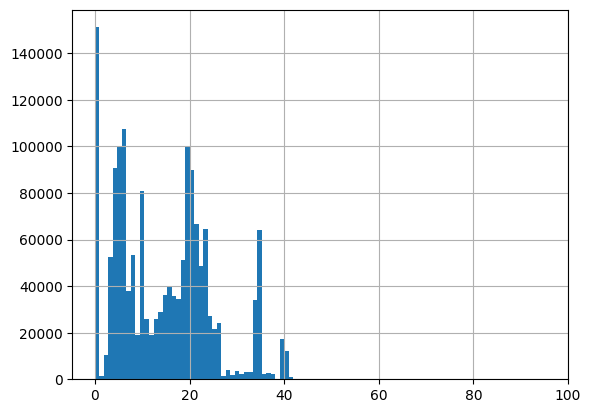

In [53]:
df['CONTRACT_INTEREST_RATE'].hist(bins=100)
plt.show()

### CONTRACT_LGD

<Axes: >

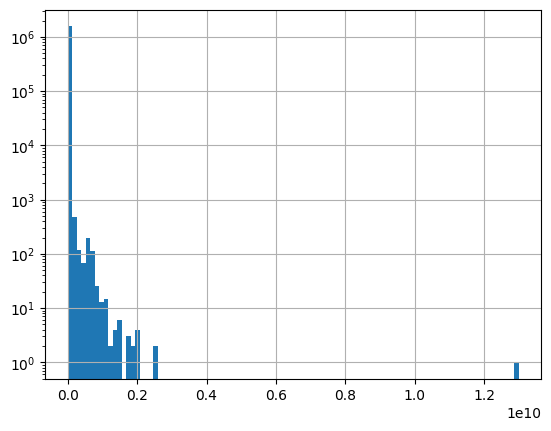

In [54]:
df['CONTRACT_LGD'].hist(bins=100, log=True)

In [55]:
# df=df[df['CONTRACT_LGD'].max()*0.5>df['CONTRACT_LGD']]

In [56]:
max=df['CONTRACT_LGD'].max()*0.5
df['CONTRACT_LGD']=df['CONTRACT_LGD'].apply(lambda x: 0 if x>max else x)

In [57]:
df['CONTRACT_LGD']=df['CONTRACT_LGD'].fillna(0)

<Axes: >

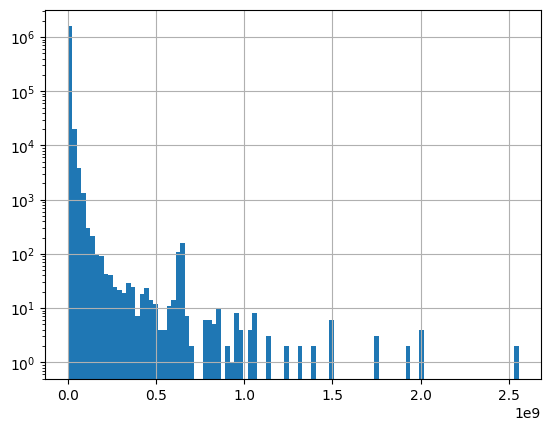

In [58]:
df['CONTRACT_LGD'].hist(bins=100, log=True)

In [59]:
print(df.isna().sum())

CONTRACT_ID                                  0
BORROWER_ID                                  0
CONTRACT_BANK_ID                             0
CONTRACT_CREDIT_INTERMEDIARY                 0
CONTRACT_CREDIT_LOSS                         0
CONTRACT_CURRENCY                            0
CONTRACT_DATE_OF_LOAN_AGREEMENT              0
CONTRACT_DEPT_SERVICE_TO_INCOME              0
CONTRACT_FREQUENCY_TYPE                      0
CONTRACT_INCOME                              0
CONTRACT_INSTALMENT_AMOUNT                   0
CONTRACT_INTEREST_RATE                       0
CONTRACT_LGD                                 0
CONTRACT_LOAN_AMOUNT                         0
CONTRACT_LOAN_CONTRACT_TYPE                  0
CONTRACT_LOAN_TO_VALUE_RATIO           1176530
CONTRACT_LOAN_TYPE                           0
CONTRACT_MARKET_VALUE                  1074843
CONTRACT_MATURITY_DATE                       0
CONTRACT_MORTGAGE_LENDING_VALUE        1064936
CONTRACT_MORTGAGE_TYPE                 1064936
CONTRACT_REFI

### CONTRACT_LOAN_AMOUNT

### CONTRACT_LOAN_CONTRACT_TYPE

In [60]:
df['CONTRACT_LOAN_CONTRACT_TYPE'].value_counts()

CONTRACT_LOAN_CONTRACT_TYPE
1     628128
2     377927
12    364821
3      81180
11     56760
9      49639
6      33077
4      11221
Name: count, dtype: int64

### CONTRACT_LOAN_TO_VALUE_RATIO

<Axes: >

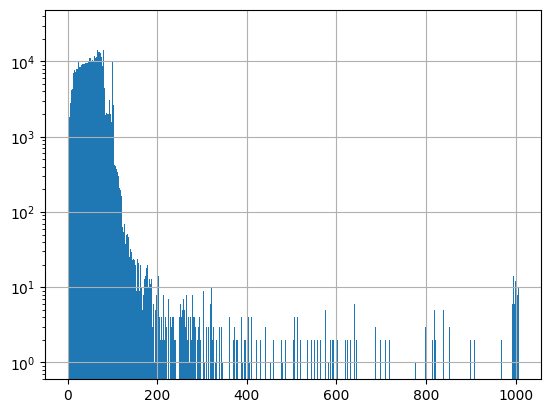

In [61]:
df['CONTRACT_LOAN_TO_VALUE_RATIO'].hist(bins=500, log=True)

In [62]:
len(df)

#df=df[df['CONTRACT_LOAN_TO_VALUE_RATIO'].max()*0.9>df['CONTRACT_LOAN_TO_VALUE_RATIO']]

1602753

In [63]:
max=df['CONTRACT_LOAN_TO_VALUE_RATIO'].max()*0.9
df['CONTRACT_LOAN_TO_VALUE_RATIO']=df['CONTRACT_LOAN_TO_VALUE_RATIO'].apply(lambda x: 0 if x>max else x)

In [64]:
df['CONTRACT_LOAN_TO_VALUE_RATIO']=df['CONTRACT_LOAN_TO_VALUE_RATIO'].fillna(0)

### CONTRACT_LOAN_TYPE

In [65]:
df['CONTRACT_LOAN_TYPE'].value_counts()

CONTRACT_LOAN_TYPE
b503a0de    1008064
1f951336     157973
d3aaffde      90930
7e2065f4      88126
69f70539      68104
2f88e16c      58702
955ae3ef      57006
cf07c2dd      36335
5a06241e      21028
83910425       6920
694cbaee       3497
0aeb4094       2764
eab72d7a       2310
95c4f8fb        571
f792971b        240
cde77491        106
47693941         74
8fe006f1          3
Name: count, dtype: int64

### CONTRACT_MARKET_VALUE

In [66]:
len(df)

1602753

<Axes: >

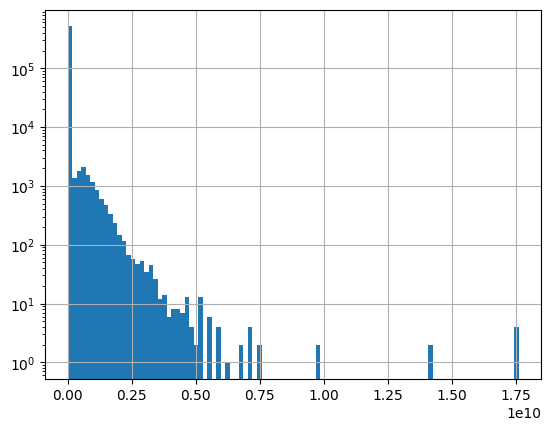

In [67]:
df['CONTRACT_MARKET_VALUE'].hist(bins=100, log=True)

In [68]:
#df=df[df['CONTRACT_MARKET_VALUE'].max()*0.9>df['CONTRACT_MARKET_VALUE']]

In [69]:
max=df['CONTRACT_MARKET_VALUE'].max()*0.9
df['CONTRACT_MARKET_VALUE']=df['CONTRACT_MARKET_VALUE'].apply(lambda x: 0 if x>max else x)

In [70]:
df['CONTRACT_MARKET_VALUE']=df['CONTRACT_MARKET_VALUE'].fillna(0)

In [71]:
len(df)

1602753

### CONTRACT_MATURITY_DATE

### CONTRACT_MORTGAGE_LENDING_VALUE

In [72]:
df['CONTRACT_MORTGAGE_LENDING_VALUE']=df['CONTRACT_MORTGAGE_LENDING_VALUE'].fillna(0)

In [73]:
# df=df[df['CONTRACT_MORTGAGE_LENDING_VALUE'].max()*0.9>df['CONTRACT_MORTGAGE_LENDING_VALUE']]

In [74]:
max=df['CONTRACT_MORTGAGE_LENDING_VALUE'].max()*0.9
df['CONTRACT_MORTGAGE_LENDING_VALUE']=df['CONTRACT_MORTGAGE_LENDING_VALUE'].apply(lambda x: 0 if x>max else x)

<Axes: >

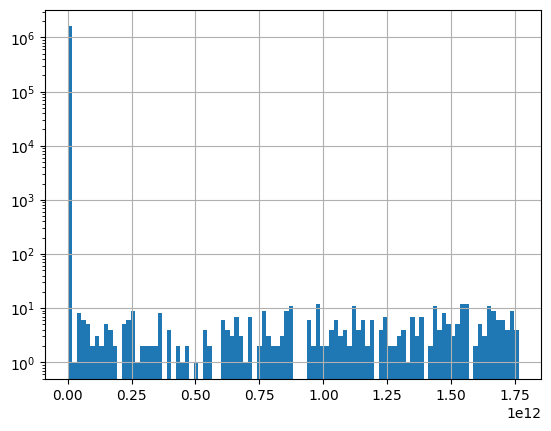

In [75]:
df['CONTRACT_MORTGAGE_LENDING_VALUE'].hist(bins=100, log=True)

In [76]:
len(df)

1602753

### CONTRACT_MORTGAGE_TYPE

In [77]:
df['CONTRACT_MORTGAGE_TYPE']=df['CONTRACT_MORTGAGE_TYPE'].fillna(0)

### CONTRACT_REFINANCED

In [78]:
df['CONTRACT_REFINANCED'].value_counts()

CONTRACT_REFINANCED
2.0        1405958
1.0         119039
10001.0      17374
0.0            960
Name: count, dtype: int64

In [79]:
df['CONTRACT_REFINANCED']=df['CONTRACT_REFINANCED'].fillna(0)

### CONTRACT_RISK_WEIGHTED_ASSETS

<Axes: >

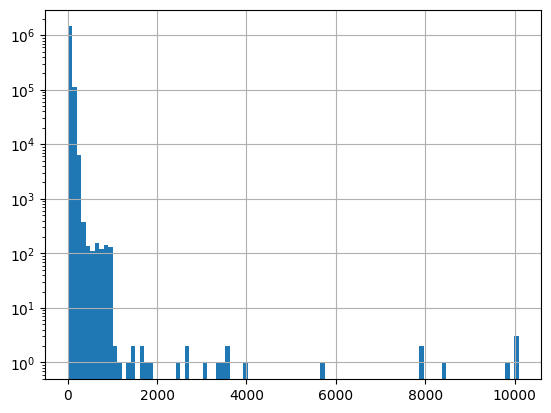

In [80]:
df['CONTRACT_RISK_WEIGHTED_ASSETS'].hist(bins=100, log=True)

In [81]:
# df=df[df['CONTRACT_RISK_WEIGHTED_ASSETS'].max()*0.5>df['CONTRACT_RISK_WEIGHTED_ASSETS']]

In [82]:
max=df['CONTRACT_RISK_WEIGHTED_ASSETS'].max()*0.5
df['CONTRACT_RISK_WEIGHTED_ASSETS']=df['CONTRACT_RISK_WEIGHTED_ASSETS'].apply(lambda x: 0 if x>max else x)

In [83]:
df['CONTRACT_RISK_WEIGHTED_ASSETS']=df['CONTRACT_RISK_WEIGHTED_ASSETS'].fillna(0)

### CONTRACT_TYPE_OF_INTEREST_REPAYMENT

In [84]:
df['CONTRACT_TYPE_OF_INTEREST_REPAYMENT']=df['CONTRACT_TYPE_OF_INTEREST_REPAYMENT'].fillna(0)

### TARGET_EVENT_DAY

### TARGET_EVENT

### Check ISNA

In [85]:
df.head(10)

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
0,TpK8osXs,d8SqtuEV,1d42bbf5,2.0,0.0,31,2457052,0.00,479a2e13,0.0,...,1.00,0.0,1246.0,98.0,98.0,20.0,A,0.0,-,NaN
1,EtIEHrcH,lrdxML0g,1d42bbf5,0.0,0.0,31,2457036,0.00,479a2e13,0.0,...,74.17,0.0,1246.0,98.0,0.0,0.0,A,0.0,-,NaN
2,1G10DfKj,gII7nnq4,1d42bbf5,2.0,16350.0,31,2457043,7.05,479a2e13,127305.0,...,74.77,100003.0,1246.0,98.0,98.0,179.0,A,7.0,-,NaN
3,2NLT774,MMkJ8z/e,1d42bbf5,0.0,0.0,31,2457038,0.00,479a2e13,0.0,...,0.99,0.0,1246.0,98.0,98.0,0.0,A,0.0,-,NaN
4,VpylRvay,M417onFP,1d42bbf5,2.0,2395.0,31,2457091,0.00,479a2e13,0.0,...,74.30,100002.0,1246.0,98.0,98.0,178.0,A,1.0,-,NaN
5,5tsDwTjS,u9GRAuen,1d42bbf5,2.0,0.0,31,2457093,0.00,479a2e13,0.0,...,0.98,0.0,1246.0,98.0,98.0,0.0,A,0.0,-,NaN
6,drZAWXaR,XPWFcJZI,1d42bbf5,0.0,0.0,31,2457095,33.94,479a2e13,172647.0,...,1.00,0.0,1246.0,98.0,0.0,0.0,A,0.0,-,NaN
7,ebtK6u+,L2Nu2zZe,1d42bbf5,2.0,0.0,31,2457046,0.00,479a2e13,0.0,...,1.03,0.0,1246.0,98.0,98.0,4.0,A,0.0,-,NaN
8,ffJh4MY,5A0GWOi2,1d42bbf5,2.0,0.0,31,2457049,0.00,479a2e13,0.0,...,1.04,0.0,1246.0,98.0,98.0,0.0,A,0.0,-,NaN
9,eo09vYuo,lqPGd2+x,1d42bbf5,2.0,0.0,31,2457081,0.00,479a2e13,0.0,...,1.00,0.0,1246.0,98.0,98.0,3.0,A,0.0,-,NaN


In [86]:
# duplikalt_sorok = df[df.duplicated(subset=['CONTRACT_ID','BORROWER_ID','CONTRACT_BANK_ID'])]

In [87]:
len(df)

1602753

In [88]:
col=['CONTRACT_CREDIT_LOSS', 'TARGET_EVENT']
df2=df[col]
df2.head(100)

,CONTRACT_CREDIT_LOSS,TARGET_EVENT
0,0.0,-
1,0.0,-
2,16350.0,-
3,0.0,-
4,2395.0,-
...,...,...
95,0.0,-
96,25821.0,-
97,0.0,-
98,0.0,-


First, i should prepare the borrower data, and maybe with that, i could predict certain elements  of the contract data.

In [89]:
df.isna().sum()

CONTRACT_ID                                  0
BORROWER_ID                                  0
CONTRACT_BANK_ID                             0
CONTRACT_CREDIT_INTERMEDIARY                 0
CONTRACT_CREDIT_LOSS                         0
CONTRACT_CURRENCY                            0
CONTRACT_DATE_OF_LOAN_AGREEMENT              0
CONTRACT_DEPT_SERVICE_TO_INCOME              0
CONTRACT_FREQUENCY_TYPE                      0
CONTRACT_INCOME                              0
CONTRACT_INSTALMENT_AMOUNT                   0
CONTRACT_INTEREST_RATE                       0
CONTRACT_LGD                                 0
CONTRACT_LOAN_AMOUNT                         0
CONTRACT_LOAN_CONTRACT_TYPE                  0
CONTRACT_LOAN_TO_VALUE_RATIO                 0
CONTRACT_LOAN_TYPE                           0
CONTRACT_MARKET_VALUE                        0
CONTRACT_MATURITY_DATE                       0
CONTRACT_MORTGAGE_LENDING_VALUE              0
CONTRACT_MORTGAGE_TYPE                       0
CONTRACT_REFI

In [90]:
df['CONTRACT_FREQUENCY_TYPE'].value_counts()

CONTRACT_FREQUENCY_TYPE
479a2e13    1477500
2f88e16c      58702
87db11f5      47152
3265c5b7      17386
ad534644       1616
89efd382        337
2aebe4cb         53
bd092d5a          7
Name: count, dtype: int64

#### CONTRACT_CREDIT_LOSS

In [91]:
df.isna().sum()

CONTRACT_ID                                  0
BORROWER_ID                                  0
CONTRACT_BANK_ID                             0
CONTRACT_CREDIT_INTERMEDIARY                 0
CONTRACT_CREDIT_LOSS                         0
CONTRACT_CURRENCY                            0
CONTRACT_DATE_OF_LOAN_AGREEMENT              0
CONTRACT_DEPT_SERVICE_TO_INCOME              0
CONTRACT_FREQUENCY_TYPE                      0
CONTRACT_INCOME                              0
CONTRACT_INSTALMENT_AMOUNT                   0
CONTRACT_INTEREST_RATE                       0
CONTRACT_LGD                                 0
CONTRACT_LOAN_AMOUNT                         0
CONTRACT_LOAN_CONTRACT_TYPE                  0
CONTRACT_LOAN_TO_VALUE_RATIO                 0
CONTRACT_LOAN_TYPE                           0
CONTRACT_MARKET_VALUE                        0
CONTRACT_MATURITY_DATE                       0
CONTRACT_MORTGAGE_LENDING_VALUE              0
CONTRACT_MORTGAGE_TYPE                       0
CONTRACT_REFI

In [92]:
df.nunique()

CONTRACT_ID                            1274533
BORROWER_ID                            1149851
CONTRACT_BANK_ID                           136
CONTRACT_CREDIT_INTERMEDIARY                 4
CONTRACT_CREDIT_LOSS                    165006
CONTRACT_CURRENCY                            3
CONTRACT_DATE_OF_LOAN_AGREEMENT           1072
CONTRACT_DEPT_SERVICE_TO_INCOME          11367
CONTRACT_FREQUENCY_TYPE                      8
CONTRACT_INCOME                         410880
CONTRACT_INSTALMENT_AMOUNT              152495
CONTRACT_INTEREST_RATE                    4322
CONTRACT_LGD                            879302
CONTRACT_LOAN_AMOUNT                    835480
CONTRACT_LOAN_CONTRACT_TYPE                  8
CONTRACT_LOAN_TO_VALUE_RATIO             11630
CONTRACT_LOAN_TYPE                          18
CONTRACT_MARKET_VALUE                   274388
CONTRACT_MATURITY_DATE                   10744
CONTRACT_MORTGAGE_LENDING_VALUE         271959
CONTRACT_MORTGAGE_TYPE                      18
CONTRACT_REFI

In [93]:
# df=df.drop_duplicates()

print(df.shape)
df.to_csv('data/df.csv', index=False)

(1602753, 32)


In [94]:
len(df)

1602753